---
title: "Palmer Penguins Dataset"
author: Kazuharu Yangimoto
date: 2025-06-14
jupyter: nbstata
format:
  html:
    code-tools: true
  typst: default
  ipynb: default
---

In [ ]:
*| label: setup-nbstata
*| include: false
*%set graph_format = svg

In [21]:
cd

c:\Users\derik\Downloads\stata-vscode


In [22]:
*| label: setup
use "data/penguins.dta", clear

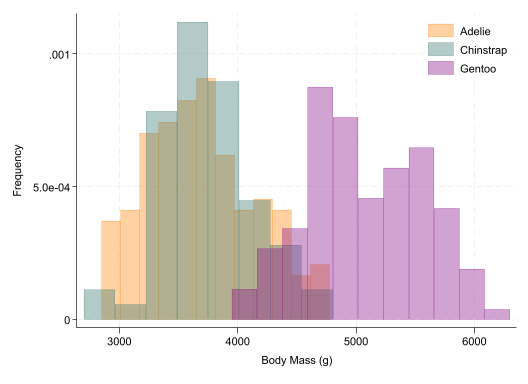

In [23]:
*| label: fig-hist-bodymass
*| fig-cap: Histogram of Body Mass by Species
twoway (hist body_mass if species == 1, color(orange%40)) ///
  (hist body_mass if species == 2, color(emerald%40)) ///
  (hist body_mass if species == 3, color(purple%40)), ///
   xtitle("Body Mass (g)") ytitle("Frequency") ///
   legend(order(1 "Adelie" 2 "Chinstrap" 3 "Gentoo") pos(1) ring(0) col(1)) ///
   plotregion(fcolor(white)) graphregion(fcolor(white))

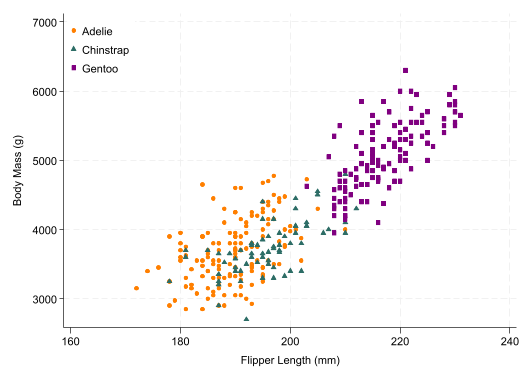

In [24]:
*| label: fig-bodymass-flipper
*| fig-cap: Body Mass vs. Flipper Length by Species
cap drop body_mass?
qui separate body_mass, by(species)
twoway scatter body_mass? flipper_len, ///
   mcolor(orange emerald purple) mlab("") ///
   msymbol(O T S) ///
   xtitle("Flipper Length (mm)") ytitle("Body Mass (g)") ///
   legend(order(1 "Adelie" 2 "Chinstrap" 3 "Gentoo") pos(11) ring(0) col(1)) ///
   plotregion(fcolor(white)) graphregion(fcolor(white))

In [25]:
*| label: reg-bill-length
qui{
    eststo clear
    eststo: reg bill_len i.species, robust
    eststo: reg bill_len i.species sex, robust
    eststo: reg bill_len i.species sex year, robust
}
esttab


------------------------------------------------------------
                      (1)             (2)             (3)   
                 bill_len        bill_len        bill_len   
------------------------------------------------------------
1.species               0               0               0   
                      (.)             (.)             (.)   

2.species           10.04***        10.01***        10.04***
                  (21.91)         (28.61)         (28.60)   

3.species           8.713***        8.698***        8.693***
                  (24.71)         (30.53)         (30.82)   

sex                                 3.694***        3.694***
                                  (14.54)         (14.61)   

year                                                0.324*  
                                                   (2.02)   

_cons               38.79***        33.28***       -617.9   
                 (178.78)         (81.19)         (-1.92)   
------------------

In [26]:
*| label: reg-body-mass
qui{
    eststo clear
    eststo: reg body_mass i.species, robust
    eststo: reg body_mass i.species sex, robust
    eststo: reg body_mass i.species sex year, robust
}
esttab


------------------------------------------------------------
                      (1)             (2)             (3)   
                body_mass       body_mass       body_mass   
------------------------------------------------------------
1.species               0               0               0   
                      (.)             (.)             (.)   

2.species           32.43           26.92           27.23   
                   (0.54)          (0.55)          (0.55)   

3.species          1375.4***       1377.9***       1377.8***
                  (23.37)         (36.24)         (36.15)   

sex                                 667.6***        667.6***
                                  (19.25)         (19.22)   

year                                                3.629   
                                                   (0.17)   

_cons              3700.7***       2704.8***      -4582.9   
                  (99.06)         (49.92)         (-0.11)   
------------------